# Introduction

1. **Overall Analysis**:  includes visualization of the data on various grounds like market cap, volumes of shares traded and the returns. This also includes calculation of various portfolio properties
2. **T-Bill Data**
3. **Max. Sharpe ratio Portfolio**
4. **Minimum Volatility Portfolio**
5. **Kelly's Portfolio**
6. **Equal weighted Portfolio**



# Overall Analysis

In [ ]:
#installing yfinance for extracting data from Yahoo Finance
!pip install yfinance

     |████████████████████████████████| 6.3 MB 7.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=9f333cc6202348614c2e5e8c6687677f7dce1d51a6c7b473d148fece32c268f6
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
#importing libraries
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import yfinance as yf
import statistics
%matplotlib inline

In [ ]:
start = "2014-01-01"
end = "2021-08-17"
itc = yf.download('ITC.NS',start,end)
airtel = yf.download('BHARTIARTL.NS',start,end)
bajaj = yf.download('BAJFINANCE.NS',start,end)
tcs=yf.download('TCS.NS',start,end)
hul=yf.download('HINDUNILVR.NS',start,end)
reliance=yf.download('RELIANCE.NS',start,end)
dlf=yf.download('DLF.NS',start,end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
itc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-01,214.866669,215.600006,214.066666,214.933334,176.456100,1859278
2014-01-02,214.899994,216.666672,209.533340,209.966660,172.378586,6784786
2014-01-03,210.000000,210.666672,206.899994,209.833328,172.269135,11999877
2014-01-06,210.000000,211.133331,209.000000,210.433334,172.761719,8155128
2014-01-07,211.000000,211.600006,208.500000,211.133331,173.336365,7779138


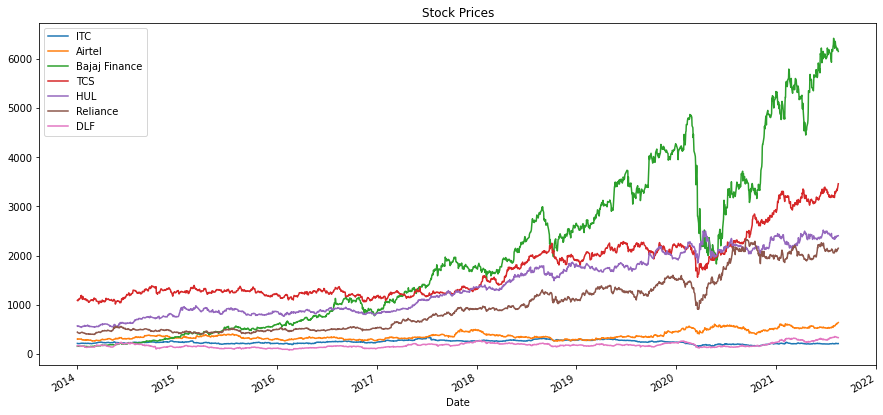

In [ ]:
itc['Open'].plot(label = 'ITC', figsize = (15,7))
airtel['Open'].plot(label = "Airtel")
bajaj['Open'].plot(label = 'Bajaj Finance')
tcs['Open'].plot(label = 'TCS')
hul['Open'].plot(label = 'HUL')
reliance['Open'].plot(label = 'Reliance')
dlf['Open'].plot(label = 'DLF')
plt.title('Stock Prices')
plt.legend()

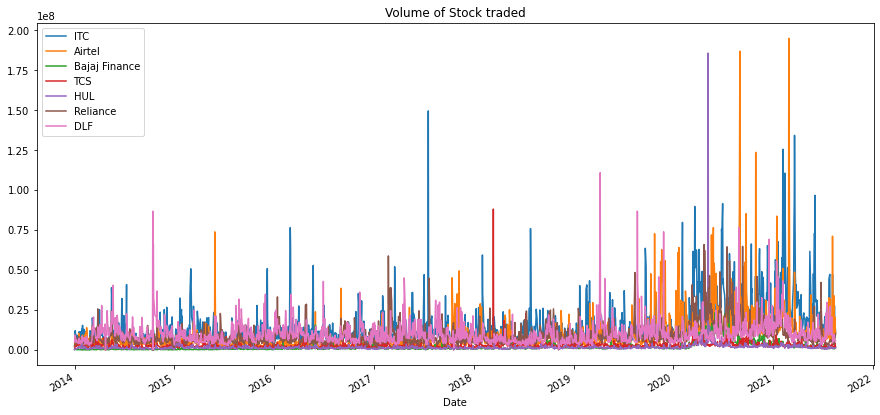

In [ ]:
itc['Volume'].plot(label = 'ITC', figsize = (15,7))
airtel['Volume'].plot(label = "Airtel")
bajaj['Volume'].plot(label = 'Bajaj Finance')
tcs['Volume'].plot(label = 'TCS')
hul['Volume'].plot(label = 'HUL')
reliance['Volume'].plot(label = 'Reliance')
dlf['Volume'].plot(label = 'DLF')

plt.title('Volume of Stock traded')
plt.legend()

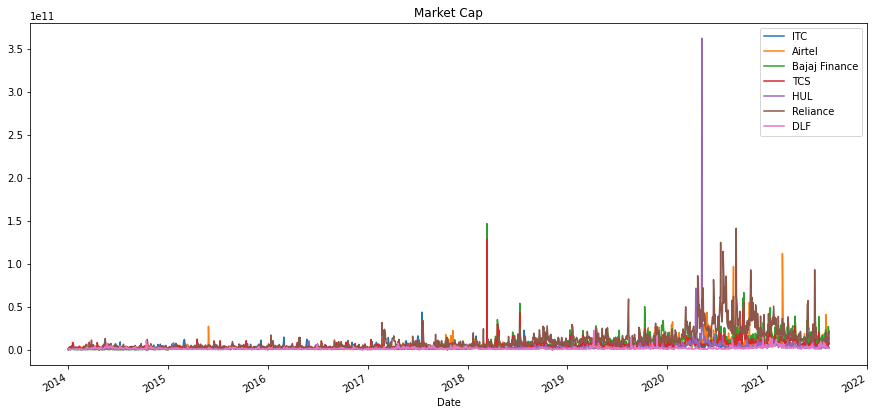

In [ ]:
#Market Capitalisation
tcs['MarktCap'] = tcs['Open'] * tcs['Volume']
itc['MarktCap'] = itc['Open'] * itc['Volume']
airtel['MarktCap'] = airtel['Open'] * airtel['Volume']
bajaj['MarktCap'] = bajaj['Open'] * asianp['Volume']
hul['MarktCap'] = hul['Open'] * hul['Volume']
reliance['MarktCap'] = reliance['Open'] * reliance['Volume']
dlf['MarktCap'] = dlf['Open'] * dlf['Volume']

itc['MarktCap'].plot(label = 'ITC', figsize = (15,7))
airtel['MarktCap'].plot(label = "Airtel")
bajaj['MarktCap'].plot(label = 'Bajaj Finance')
tcs['MarktCap'].plot(label = 'TCS')
hul['MarktCap'].plot(label = 'HUL')
reliance['MarktCap'].plot(label = 'Reliance')
dlf['MarktCap'].plot(label = 'DLF')

plt.title('Market Cap')
plt.legend()

In [ ]:
itc['returns'] = (itc['Close']/itc['Close'].shift(1)) -1
bajaj['returns'] = (bajaj['Close']/bajaj['Close'].shift(1))-1
airtel['returns'] = (airtel['Close']/airtel['Close'].shift(1)) - 1
tcs['returns'] = (tcs['Close']/tcs['Close'].shift(1)) -1
hul['returns'] = (hul['Close']/hul['Close'].shift(1)) -1 
reliance['returns'] = (reliance['Close']/reliance['Close'].shift(1)) -1
dlf['returns'] = (dlf['Close']/dlf['Close'].shift(1)) -1

In [ ]:
dlf.head()

,Open,High,Low,Close,Adj Close,Volume,MarktCap,returns
Date,,,,,,,,
2014-01-01,167.600006,170.699997,166.649994,170.100006,155.363846,4944090,8.286295e+08,NaN
2014-01-02,170.350006,174.649994,165.300003,166.449997,152.030014,9278583,1.580607e+09,-0.021458
2014-01-03,165.000000,169.750000,163.350006,168.899994,154.267776,7211775,1.189943e+09,0.014719
2014-01-06,169.000000,169.750000,165.100006,166.800003,152.349701,4924864,8.323020e+08,-0.012433
2014-01-07,166.199997,169.000000,162.199997,163.949997,149.746613,6468312,1.075033e+09,-0.017086


In [ ]:
tcs=tcs[1:]

In [ ]:
tcs.head()

,Open,High,Low,Close,Adj Close,Volume,MarktCap,returns
Date,,,,,,,,
2014-01-02,1083.000000,1094.500000,1078.074951,1083.500000,922.147461,1726948,1.870285e+09,0.006362
2014-01-03,1082.349976,1114.550049,1073.625000,1111.099976,945.637451,2618174,2.833781e+09,0.025473
2014-01-06,1114.500000,1122.000000,1098.500000,1119.800049,953.041992,2311810,2.576512e+09,0.007830
2014-01-07,1120.000000,1128.224976,1099.500000,1103.074951,938.807312,2897486,3.245184e+09,-0.014936
2014-01-08,1106.000000,1122.000000,1105.000000,1116.324951,950.084351,2550020,2.820322e+09,0.012012


In [ ]:
itc=itc[1:]
bajaj=bajaj[1:]
airtel=airtel[1:]
hul=hul[1:]
reliance=reliance[1:]
dlf=dlf[1:]

In [ ]:
nifty=yf.download('^NSEI',start,end)
nifty['returns'] = (nifty['Close']/nifty['Close'].shift(1)) -1
nifty=nifty[1:]
nifty1=nifty.returns

[*********************100%***********************]  1 of 1 completed


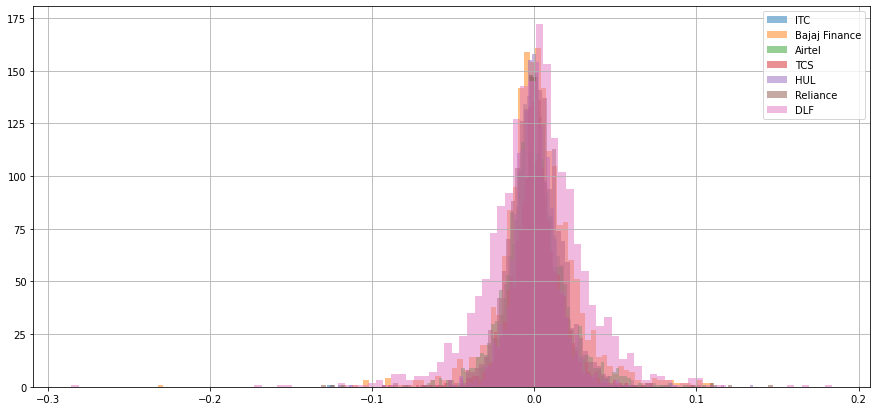

In [ ]:
itc['returns'].hist(bins = 100, label = 'ITC', alpha = 0.5, figsize = (15,7))
bajaj['returns'].hist(bins = 100, label = 'Bajaj Finance', alpha = 0.5)
airtel['returns'].hist(bins = 100, label = 'Airtel', alpha = 0.5)
tcs['returns'].hist(bins = 100, label = 'TCS', alpha = 0.5)
hul['returns'].hist(bins = 100, label = 'HUL', alpha = 0.5)
reliance['returns'].hist(bins = 100, label = 'Reliance', alpha = 0.5)
dlf['returns'].hist(bins = 100, label = 'DLF', alpha = 0.5)

plt.legend()

In [ ]:
import statistics
tcsv=statistics.stdev(tcs['returns'])

In [ ]:
tcsv

0.01572047283529131

In [ ]:
itcv=statistics.stdev(itc['returns'])
bajajv=statistics.stdev(bajaj['returns'])
airtelv=statistics.stdev(airtel['returns'])
tcsv=statistics.stdev(tcs['returns'])
hulv=statistics.stdev(hul['returns'])
reliancev=statistics.stdev(reliance['returns'])
dlfv=statistics.stdev(dlf['returns'])

In [ ]:
# !pip install factor_analyzer

In [ ]:
import matplotlib.pyplot as plt #matplotlib.pyplot is a state-based interface to matplotlib
import matplotlib.ticker as mtick #This module contains classes for configuring tick locating and formatting.

#to perform exploratory and factor analysis (EFA), with several optional rotations.
#Factor Analysis (FA) isused to search influential underlying factors or latent variables from a set of observed variables.

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity  
from factor_analyzer.factor_analyzer import calculate_kmo

from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [ ]:
tcs1=tcs.returns

In [ ]:
tcs1.head()

Date
2014-01-02    0.006362
2014-01-03    0.025473
2014-01-06    0.007830
2014-01-07   -0.014936
2014-01-08    0.012012
Name: returns, dtype: float64

In [ ]:
itc1=itc.returns
bajaj1=bajaj.returns
airtel1=airtel.returns
tcs1=tcs.returns
hul1=hul.returns
reliance1=reliance.returns
dlf1=dlf.returns

In [ ]:
result = pd.concat([itc1, bajaj1,airtel1,tcs1,hul1,reliance1,dlf1], axis=1)

In [ ]:
result.head()

,returns,returns,returns,returns,returns,returns,returns
Date,,,,,,,
2014-01-02,-0.023108,-0.000701,-0.026795,0.006362,-0.017384,-0.015527,-0.021458
2014-01-03,-0.000635,-0.008731,0.001977,0.025473,0.004623,-0.012286,0.014719
2014-01-06,0.002859,-0.002604,0.000000,0.007830,-0.002655,-0.010761,-0.012433
2014-01-07,0.003326,0.001676,0.007135,-0.014936,-0.008075,-0.015030,-0.017086
2014-01-08,0.000474,0.000901,0.002110,0.012012,0.000358,0.008253,-0.011589


In [ ]:
result.describe()

,returns,returns,returns,returns,returns,returns,returns
count,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000
mean,0.000132,0.002282,0.000589,0.000748,0.000877,0.001020,0.000842
std,0.016782,0.024614,0.020424,0.015720,0.014687,0.018359,0.031067
min,-0.128143,-0.232308,-0.119529,-0.094103,-0.088707,-0.131539,-0.285568
25%,-0.008240,-0.009314,-0.010828,-0.007420,-0.007373,-0.008978,-0.014703
50%,-0.000181,0.001149,-0.000314,0.000418,0.000047,0.000519,0.001546
75%,0.008362,0.013772,0.010398,0.008866,0.008320,0.010865,0.017331
max,0.100457,0.110052,0.112908,0.098451,0.134998,0.147180,0.183807


In [ ]:
result.columns = ['r_tcs', 'r_infy','r_wipro','r_asianp','r_hdfcb','r_reliance','r_lt']

In [ ]:
result.describe()

,r_tcs,r_infy,r_wipro,r_asianp,r_hdfcb,r_reliance,r_lt
count,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000
mean,0.000132,0.002282,0.000589,0.000748,0.000877,0.001020,0.000842
std,0.016782,0.024614,0.020424,0.015720,0.014687,0.018359,0.031067
min,-0.128143,-0.232308,-0.119529,-0.094103,-0.088707,-0.131539,-0.285568
25%,-0.008240,-0.009314,-0.010828,-0.007420,-0.007373,-0.008978,-0.014703
50%,-0.000181,0.001149,-0.000314,0.000418,0.000047,0.000519,0.001546
75%,0.008362,0.013772,0.010398,0.008866,0.008320,0.010865,0.017331
max,0.100457,0.110052,0.112908,0.098451,0.134998,0.147180,0.183807


In [ ]:
result=result.dropna()

In [ ]:
result.to_csv('portfolio_properties.csv')

# T-Bill Data

In [ ]:
file_name = 'tbill.csv' 
df = pd.read_csv(file_name)
df

In [ ]:
df.set_index("Date")
df['Date'] = pd.to_datetime(df['Date'])



In [ ]:
df.set_index('Date', inplace=True)
df = df.resample('W').ffill().reset_index()
print(df)

          Date  WTB3MS
0   2013-12-01   8.690
1   2013-12-08   8.690
2   2013-12-15   8.690
3   2013-12-22   8.690
4   2013-12-29   8.690
..         ...     ...
401 2021-08-08   3.420
402 2021-08-15   3.420
403 2021-08-22   3.420
404 2021-08-29   3.420
405 2021-09-05   3.440

[406 rows x 2 columns]


In [ ]:
df.head(12)

,Date,WTB3MS
0,2013-12-01,8.690
1,2013-12-08,8.690
2,2013-12-15,8.690
3,2013-12-22,8.690
4,2013-12-29,8.690
5,2014-01-05,8.756
6,2014-01-12,8.756
7,2014-01-19,8.756
8,2014-01-26,8.756
9,2014-02-02,9.088


In [ ]:
df=df[6:403]

In [ ]:
df

,Date,WTB3MS
6,2014-01-12,8.756
7,2014-01-19,8.756
8,2014-01-26,8.756
9,2014-02-02,9.088
10,2014-02-09,9.088
...,...,...
398,2021-07-18,3.420
399,2021-07-25,3.420
400,2021-08-01,3.420
401,2021-08-08,3.420


In [ ]:
df.set_index("Date")

,WTB3MS
Date,
2014-01-12,8.756
2014-01-19,8.756
2014-01-26,8.756
2014-02-02,9.088
2014-02-09,9.088
...,...
2021-07-18,3.420
2021-07-25,3.420
2021-08-01,3.420


In [ ]:
RET_data=pd.DataFrame(columns=['RET'], index=df.Date)
RET_data['RET'] = (df['WTB3MS'].values/100 + 1) ** (1/52) - 1 #edit the unit of the return data

In [ ]:
RET_data.head()

,RET
Date,
2014-01-12,0.002
2014-01-19,0.002
2014-01-26,0.002
2014-02-02,0.002
2014-02-09,0.002


In [ ]:
RET_data_weekly = (RET_data['RET']+1).resample('W').prod() - 1 
TBill = pd.DataFrame(columns=['T-Bill'], index=RET_data_weekly.index)
TBill['T-Bill'] = RET_data_weekly #convert the data to the same weekly frequency as the stock data

In [ ]:
TBill

,T-Bill
Date,
2014-01-12,0.002
2014-01-19,0.002
2014-01-26,0.002
2014-02-02,0.002
2014-02-09,0.002
...,...
2021-07-18,0.001
2021-07-25,0.001
2021-08-01,0.001


In [ ]:
nifty50.head()

,r_nifty
Date,
2014-01-12,-0.006
2014-01-19,0.015
2014-01-26,0.001
2014-02-02,-0.028
2014-02-09,-0.004


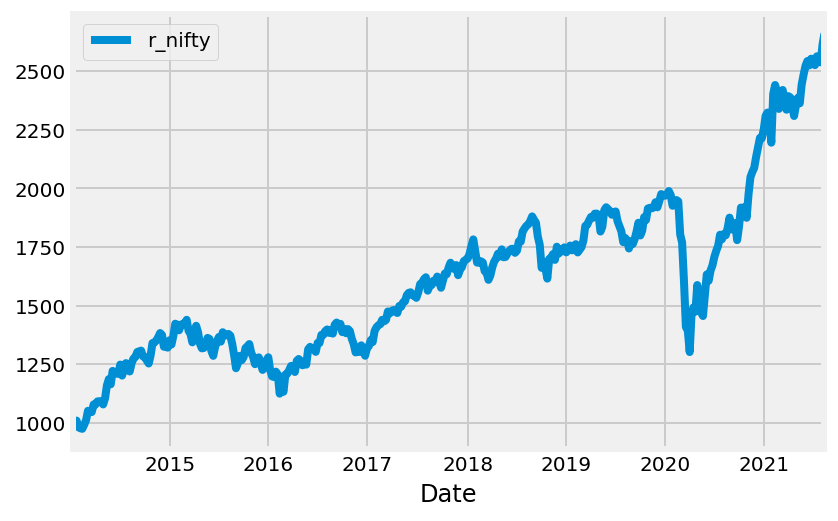

In [ ]:
Wealth_index= 1000*(1+nifty50).cumprod()
Wealth_index.plot()

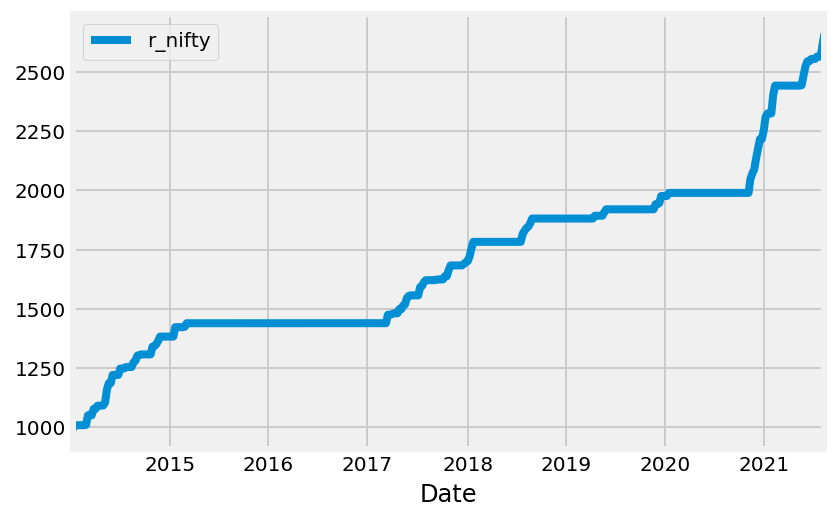

In [ ]:
Previous_peaks=Wealth_index.cummax()
Previous_peaks.plot()

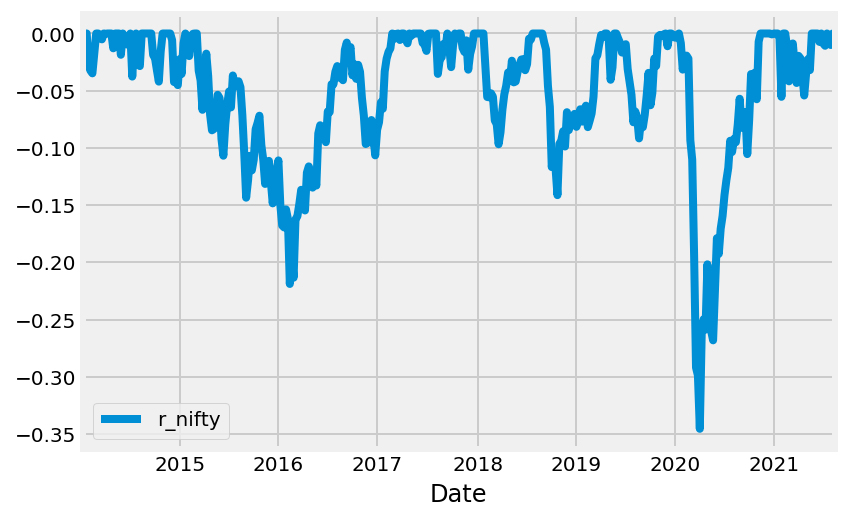

In [ ]:
draw_down=(Wealth_index-Previous_peaks)/ Previous_peaks
draw_down.plot.line()

In [ ]:
Freq = 52 #given weekly returns data 

def ann_ret(x):
    return (x+1)**Freq-1

def ann_std(x):
    return x*np.sqrt(Freq)

def ann_geo_mean(x): #average rate of return of a set of values calculated using the products of the terms.
    n = len(x)
    return np.exp(np.sum(np.log(1+x)) * Freq / n) - 1

def ann_sr(x, rf):    
    n = len(x)
    ret_expected = np.sum(x-rf)/n
    ret_avg = np.sum(x)/n
    std_dev = np.sqrt( np.sum( (x - ret_avg)**2 ) / n )
    annu_ret_expected = (ret_expected+1)**Freq-1
    annu_std_dev = std_dev * np.sqrt(Freq)
    return annu_ret_expected/annu_std_dev

def mdd(x):
    wealth = (x+1).cumprod() 
    cummax = wealth.cummax() 
    drawdown = wealth/cummax - 1  
    return drawdown.min()

In [ ]:
n_dec = 2
SumStat = pd.DataFrame(index = data.columns)
SumStat['Geo Mean(Annu,%)'] = np.round( data.apply(ann_geo_mean)*100, n_dec)
SumStat['Volatility(Annu,%)'] = np.round( ann_std(data.std())*100 , n_dec)
SumStat['Sharpe Ratio (Annu)'] = np.round( data.apply(ann_sr, rf=TBill['T-Bill']) , n_dec)
SumStat['Max Drawdown(%)'] = np.round(data.apply(mdd)*100, n_dec)
display(SumStat)

,"Geo Mean(Annu,%)","Volatility(Annu,%)",Sharpe Ratio (Annu),Max Drawdown(%)
r_tcs,16.170,23.970,0.530,-26.790
r_infy,19.530,25.330,0.640,-30.350
r_wipro,15.880,25.550,0.500,-40.510
r_asianp,27.610,23.500,1.000,-27.510
r_hdfcb,22.010,21.600,0.820,-37.240
r_reliance,23.570,28.000,0.750,-36.340
r_lt,12.050,28.560,0.350,-50.290


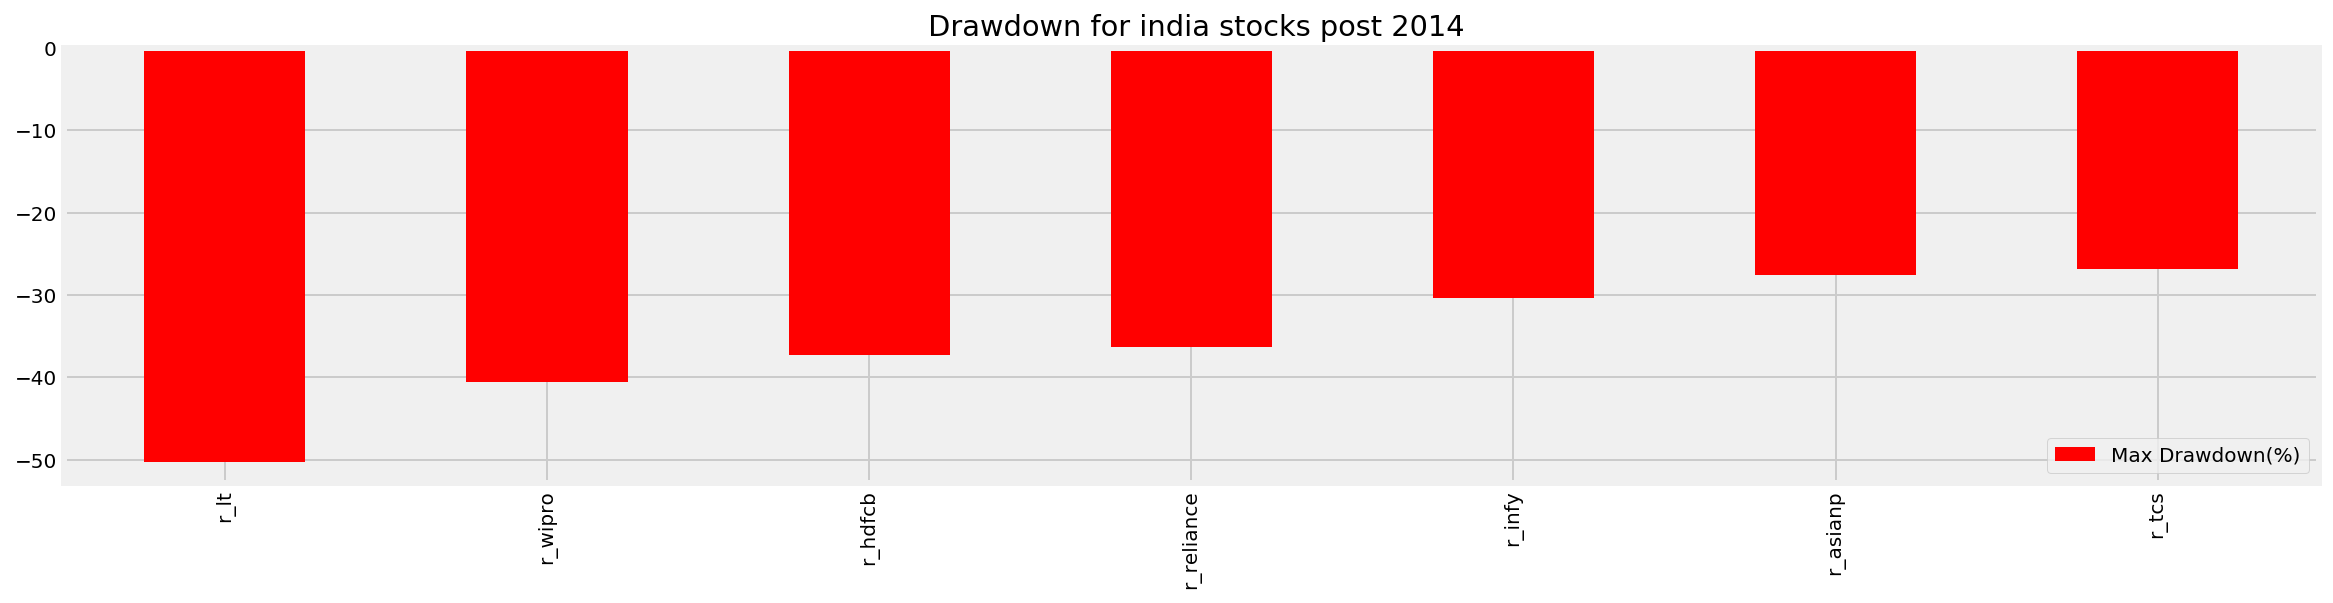

In [ ]:
SumStat["Max Drawdown(%)"].sort_values().plot.bar(grid=True,legend=True,figsize=(18,4),title=" Drawdown for india stocks post 2014",color='r')


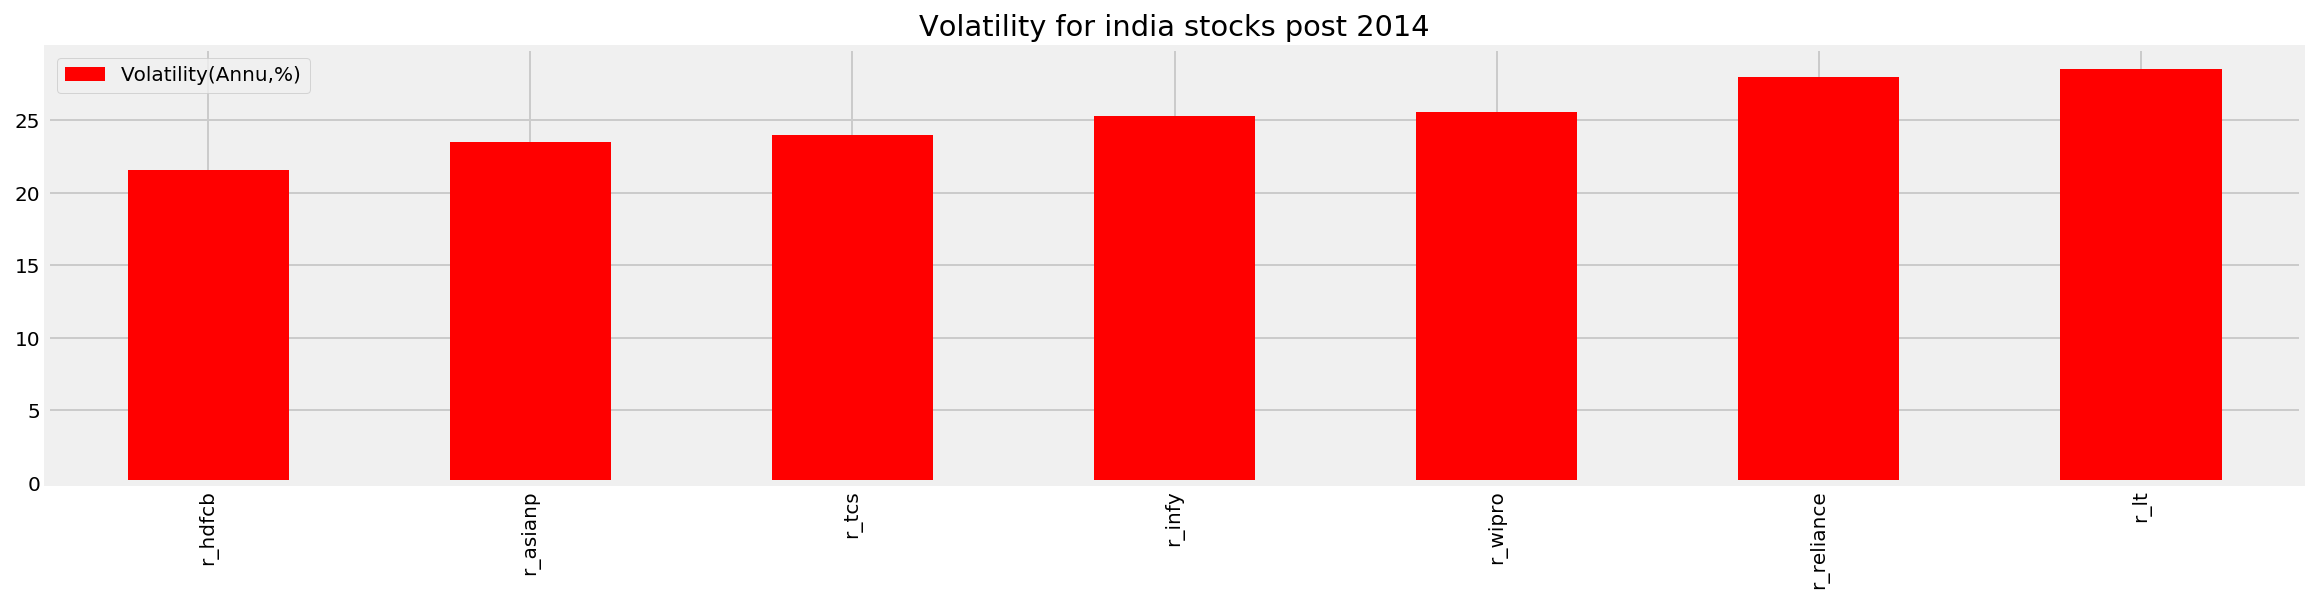

In [ ]:
SumStat["Volatility(Annu,%)"].sort_values().plot.bar(grid=True,legend=True,figsize=(18,4),title="Volatility for india stocks post 2014",color='r')

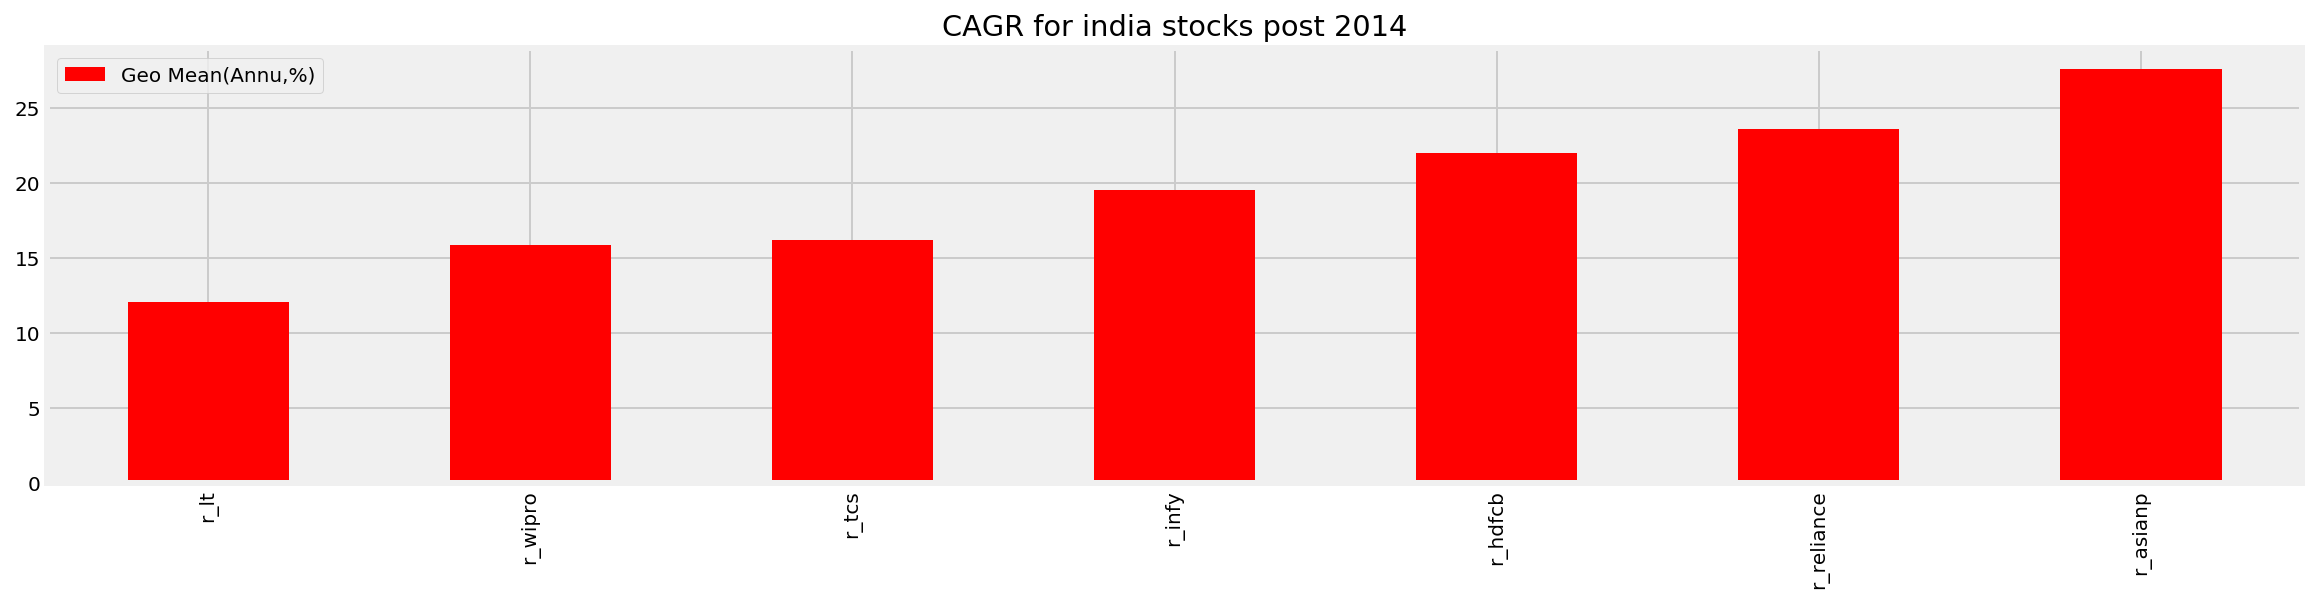

In [ ]:
SumStat["Geo Mean(Annu,%)"].sort_values().plot.bar(grid=True,legend=True,figsize=(18,4),title="CAGR for india stocks post 2014",color='r')

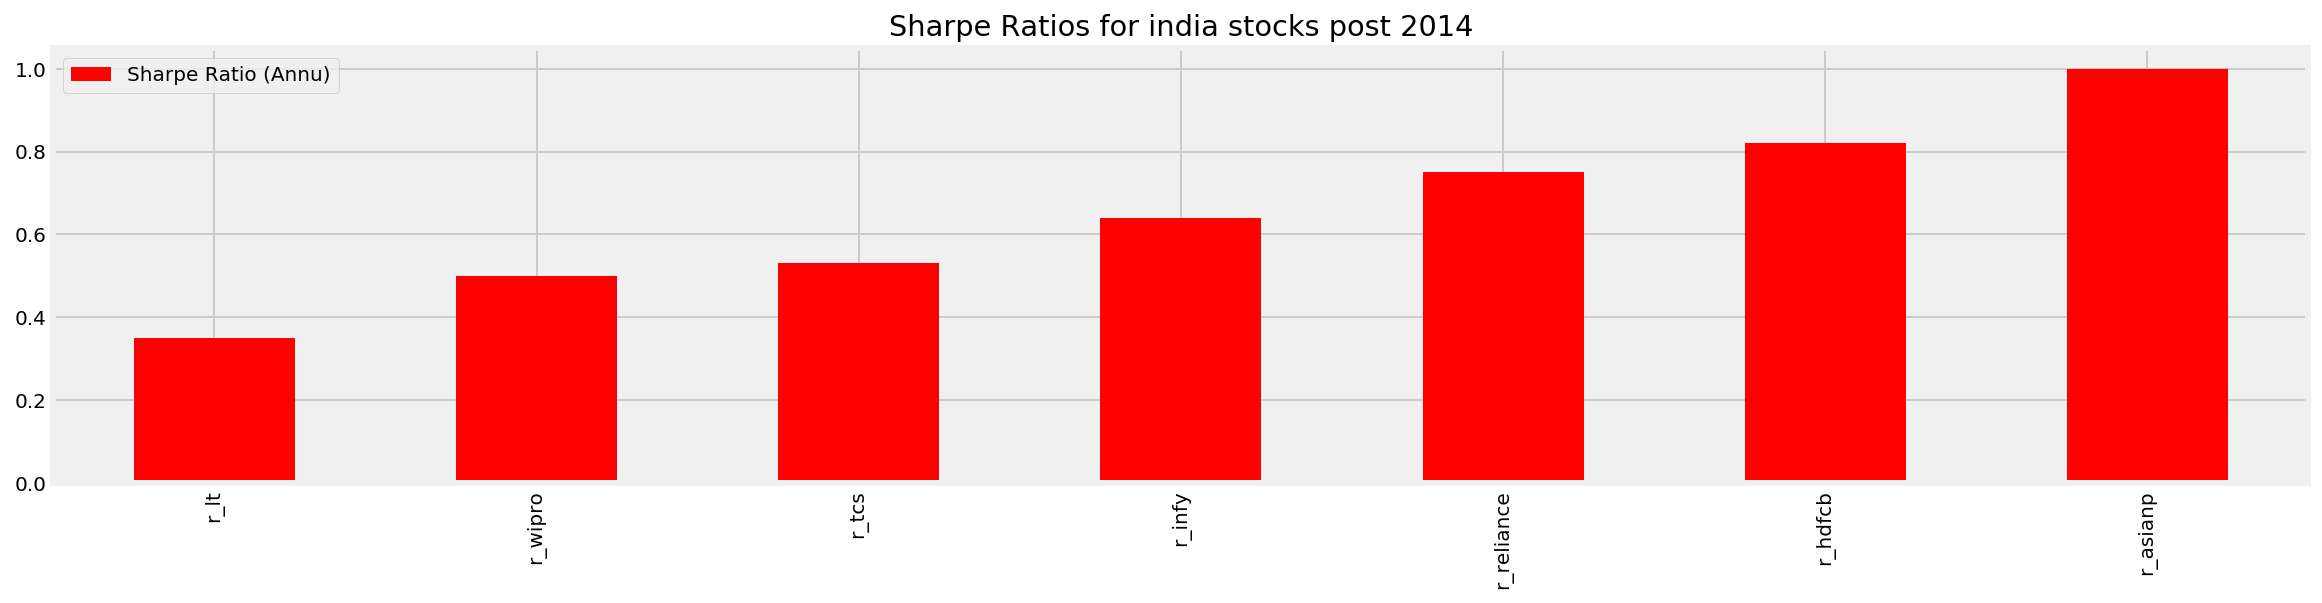

In [ ]:
SumStat["Sharpe Ratio (Annu)"].sort_values().plot.bar(grid=True,legend=True,figsize=(18,4),title="Sharpe Ratios for india stocks post 2014",color='r')

In [ ]:
def LR(X,y):
    reg = LinearRegression().fit(X.reshape(-1, 1), y.reshape(-1, 1))
    return reg.coef_,reg.intercept_

In [ ]:
data.head()

,r_tcs,r_infy,r_wipro,r_asianp,r_hdfcb,r_reliance,r_lt
Date,,,,,,,
2014-01-12,0.026,-0.004,-0.006,0.005,-0.002,-0.007,-0.055
2014-01-19,-0.030,0.050,-0.001,-0.001,0.004,0.031,0.049
2014-01-26,0.016,0.008,0.036,-0.027,0.013,-0.019,0.003
2014-02-02,-0.003,-0.015,0.004,-0.013,-0.067,-0.042,-0.020
2014-02-09,-0.043,-0.036,-0.023,0.040,0.031,-0.020,-0.002


In [ ]:
ex_ret = data.sub(TBill['T-Bill'], axis=0)
mkt_ex_ret = nifty50.sub(TBill['T-Bill'], axis=0)

In [ ]:
n = len(ex_ret.columns)
beta = np.zeros(n)
alpha = np.zeros(n)

In [ ]:
for i in range(n):
    beta[i],alpha[i] = LR(mkt_ex_ret.values,ex_ret[ex_ret.columns[i]].values)

In [ ]:
AlphaBeta = pd.DataFrame(index = data.columns)
AlphaBeta['Alpha(Annu,%)']  = np.round( ann_ret(alpha)*100, n_dec)
AlphaBeta['Beta']   = np.round(beta ,3)
display(AlphaBeta)

,"Alpha(Annu,%)",Beta
r_tcs,7.160,0.604
r_infy,10.130,0.661
r_wipro,6.830,0.653
r_asianp,17.360,0.627
r_hdfcb,8.480,0.985
r_reliance,11.730,0.972
r_lt,-0.440,1.198


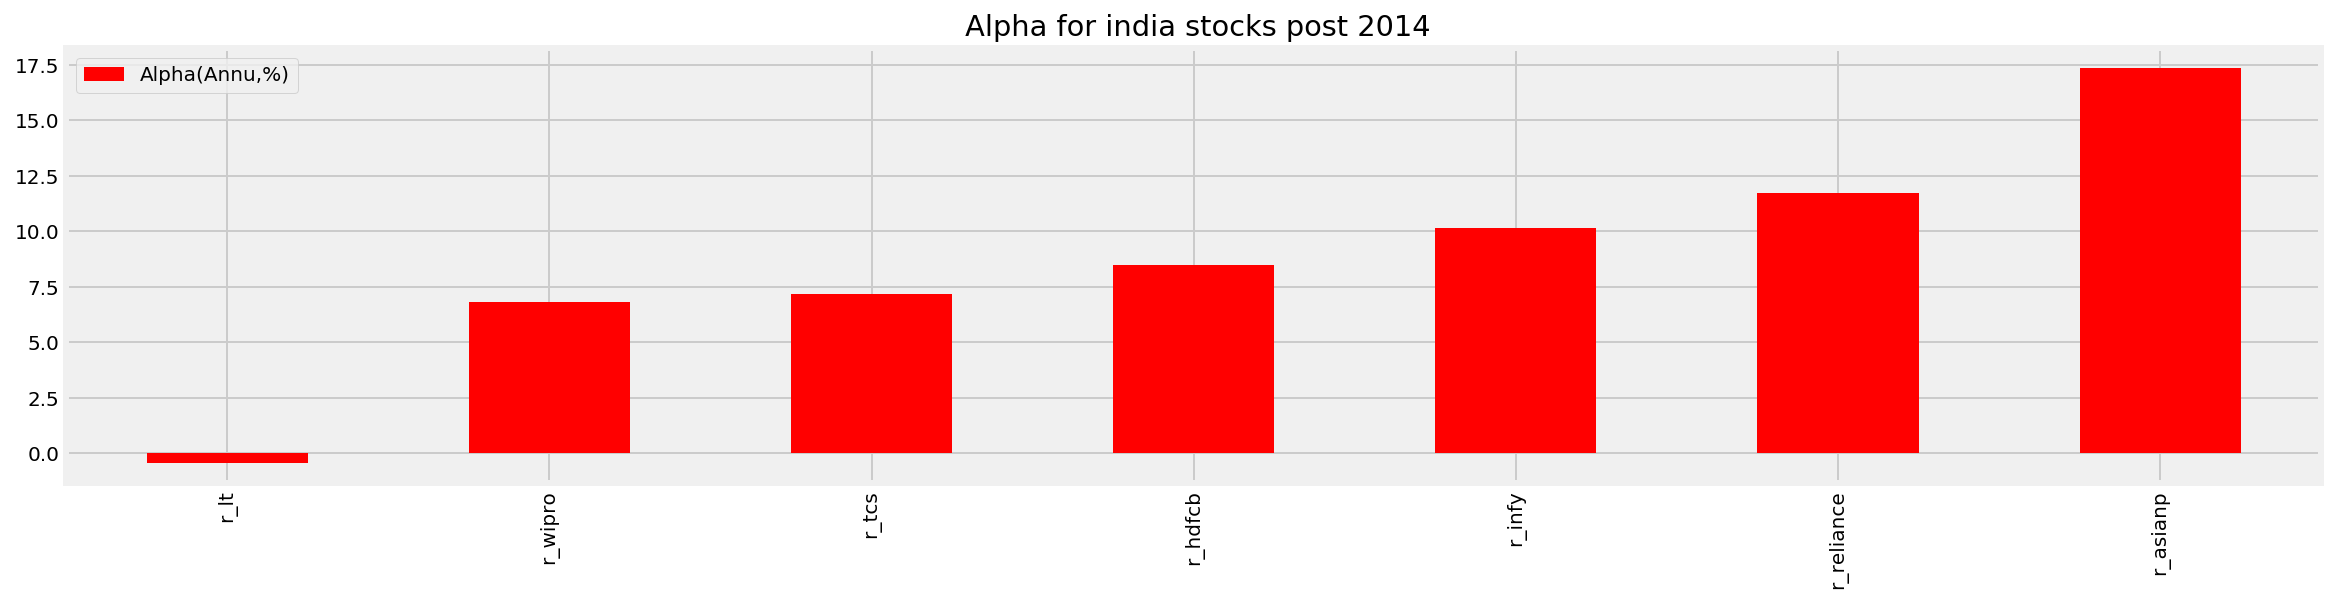

In [ ]:
AlphaBeta["Alpha(Annu,%)"].sort_values().plot.bar(grid=True,legend=True,figsize=(18,4),title=" Alpha for india stocks post 2014",color='r')

In [ ]:
AlphaBeta["Alpha(Annu,%)"].max(),AlphaBeta["Alpha(Annu,%)"].idxmax()

(17.36, 'r_asianp')

In [ ]:
SumStat["Sharpe Ratio (Annu)"].idxmax(),SumStat["Sharpe Ratio (Annu)"].max()

('r_asianp', 1.0)

In [ ]:
data_cov_mat = data.cov()
data_cov_mat_annu = data_cov_mat * Freq 
print("The Annualized Covariance matrix (for the weekly returns) is: ")
display(data_cov_mat_annu)

The Annualized Covariance matrix (for the weekly returns) is: 


,r_tcs,r_infy,r_wipro,r_asianp,r_hdfcb,r_reliance,r_lt
r_tcs,0.057,0.031,0.030,0.013,0.012,0.013,0.013
r_infy,0.031,0.064,0.031,0.010,0.014,0.018,0.011
r_wipro,0.030,0.031,0.065,0.011,0.016,0.015,0.015
r_asianp,0.013,0.010,0.011,0.055,0.013,0.019,0.021
r_hdfcb,0.012,0.014,0.016,0.013,0.047,0.023,0.031
r_reliance,0.013,0.018,0.015,0.019,0.023,0.078,0.022
r_lt,0.013,0.011,0.015,0.021,0.031,0.022,0.082


In [ ]:
chi_square_value,p_value = calculate_bartlett_sphericity(data)
print("In this Bartlett ’s test, the p-value is:", p_value)
if (p_value < 0.05):
    print("The test was statistically significant; the observed correlation matrix is not an identity matrix.")

In this Bartlett ’s test, the p-value is: 6.576464740327863e-111
The test was statistically significant; the observed correlation matrix is not an identity matrix.


In [ ]:
kmo_all,kmo_model = calculate_kmo(data)
print("In this KOM test, the overall KMO is:", kmo_model)
if (kmo_model > 0.6):
    print("Value of KMO is greater than 0.6; you can adequately perform factor analysis with the data.")

In this KOM test, the overall KMO is: 0.7566832341069761
Value of KMO is greater than 0.6; you can adequately perform factor analysis with the data.


In [ ]:
start_date_train = '2014-01-12'
end_date_train   = '2021-08-15'

In [ ]:
ind = (data.index >= start_date_train)*(data.index <= end_date_train)
data_train = data[ind].copy()
nifty50_train = nifty50[ind].copy()
TBill_train = TBill[ind].copy()

In [ ]:
data_train.shape,nifty50_train.shape,TBill_train.shape

((397, 7), (397, 1), (397, 1))

In [ ]:
data_train_mean = data_train.mean()
data_train_cov_mat = data_train.cov()

In [ ]:
no_of_weights=20
weights=[np.array([w,1-w]) for w in np.linspace(0,1,no_of_weights)]    # list comprehension
for i in range(len(weights)): 
    print (weights[i])

[0. 1.]
[0.05263158 0.94736842]
[0.10526316 0.89473684]
[0.15789474 0.84210526]
[0.21052632 0.78947368]
[0.26315789 0.73684211]
[0.31578947 0.68421053]
[0.36842105 0.63157895]
[0.42105263 0.57894737]
[0.47368421 0.52631579]
[0.52631579 0.47368421]
[0.57894737 0.42105263]
[0.63157895 0.36842105]
[0.68421053 0.31578947]
[0.73684211 0.26315789]
[0.78947368 0.21052632]
[0.84210526 0.15789474]
[0.89473684 0.10526316]
[0.94736842 0.05263158]
[1. 0.]


In [ ]:
def portfolio_return(weights, returns):
    return weights.T @ returns

def portfolio_vol(weights, covmat):
    return (weights.T @ covmat @ weights)**0.5

columns = ["r_lt", "r_asianp"]
rets = [portfolio_return(w1, data_train_mean[columns]) for w1 in weights]
vols = [portfolio_vol(w1, data_train_cov_mat.loc[columns,columns]) for w1 in weights]

In [ ]:
ef = pd.DataFrame({"Returns": rets, "Risk": vols})
ef

,Returns,Risk
0,0.005,0.033
1,0.005,0.032
2,0.005,0.031
3,0.005,0.030
4,0.005,0.029
5,0.005,0.029
6,0.005,0.029
7,0.004,0.029
8,0.004,0.029
9,0.004,0.029


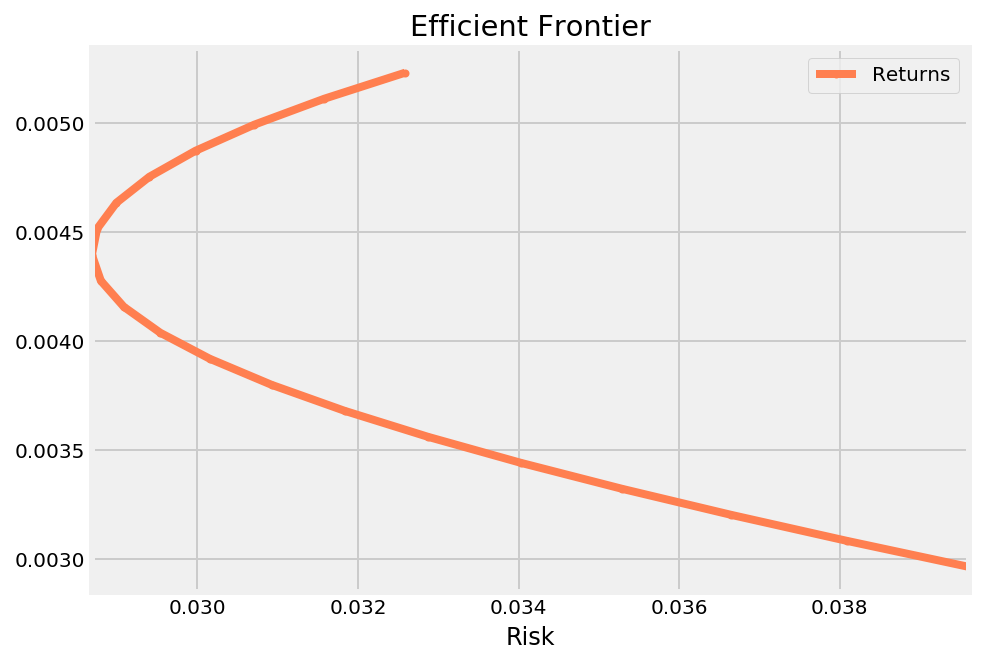

In [ ]:
import matplotlib.pyplot as plt
efficient_frontier = pd.DataFrame({"Returns": rets, "Risk": vols})
efficient_frontier.plot.line(x="Risk",y="Returns",grid='True',figsize=(7,5),title="Efficient Frontier",style=".-",color="coral")

In [ ]:
from numpy.random import random, uniform, normal, dirichlet, choice
from numpy.linalg import inv
import seaborn as sns

In [ ]:
rf_rate = TBill.mean()
mean_returns=data_train_mean
cov_matrix=data_train_cov_mat 
stocks = data_train.columns
precision_matrix = pd.DataFrame(inv(cov_matrix), index=stocks, columns=stocks)
n_obs, n_assets = data_train.shape
monthly_returns=data_train
NUM_PF=100000
n_assets, n_obs

(7, 397)

In [ ]:
alpha = np.full(shape=n_assets, fill_value=.01)
weights = dirichlet(alpha=alpha, size=NUM_PF)
weights *= choice([-1, 1], size=weights.shape)
weights.shape

(100000, 7)

In [ ]:

plt.style.use('fivethirtyeight')
np.random.seed(42)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings('ignore')

In [ ]:
periods_per_year = round(data_train.resample('A').size().mean())
periods_per_year

50

In [ ]:
x0 = uniform(0, 1, n_assets)
x0 /= np.sum(np.abs(x0))

In [ ]:
def simulate_portfolios(mean_ret, cov, rf_rate=rf_rate, short=True):
    alpha = np.full(shape=n_assets, fill_value=.05)
    weights = dirichlet(alpha=alpha, size=NUM_PF)
    if short:
        weights *= choice([-1, 1], size=weights.shape)

    returns = weights @ mean_ret.values + 1
    returns = returns ** periods_per_year - 1
    std = (weights @ data_train.T).std(1)
    std *= np.sqrt(periods_per_year)
    sharpe = (returns - rf_rate[0]) / std
    return pd.DataFrame({'Annualized Standard Deviation': std,
                         'Annualized Returns': returns,
                         'Sharpe Ratio': sharpe}), weights

In [ ]:
simul_perf, simul_wt = simulate_portfolios(mean_returns, cov_matrix, short=False)

In [ ]:
df = pd.DataFrame(simul_wt)
df.describe()

,0,1,2,3,4,5,6
count,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000
mean,0.143,0.142,0.143,0.144,0.144,0.142,0.142
std,0.301,0.300,0.301,0.302,0.302,0.301,0.301
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.045,0.046,0.045,0.045,0.046,0.044,0.045
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000


Max Sharpe: 16.56%, 27.00%


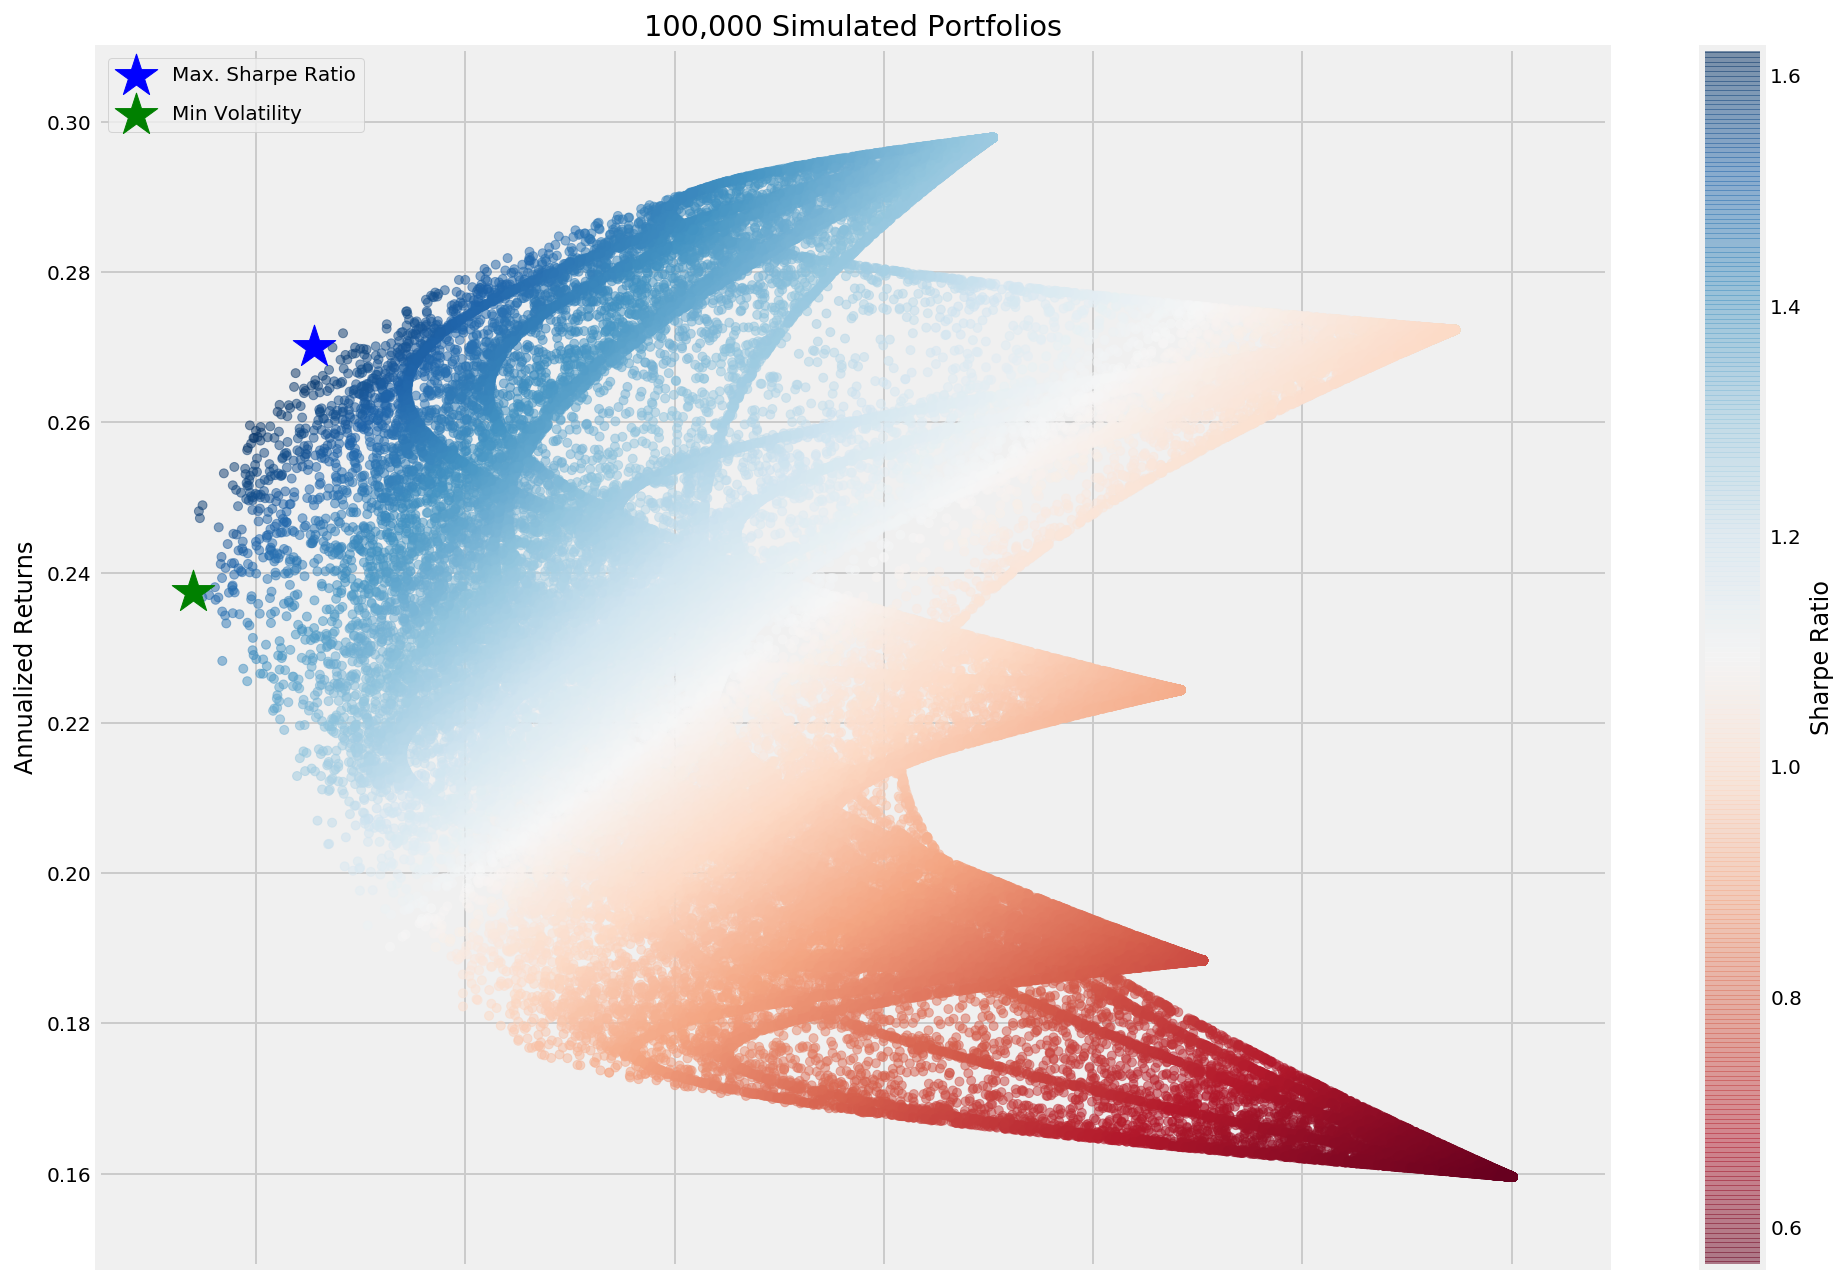

In [ ]:
ax = simul_perf.plot.scatter(x=0, y=1, c=2, cmap='RdBu',
                             alpha=0.5, figsize=(14, 9), colorbar=True,
                             title=f'{NUM_PF:,d} Simulated Portfolios')

max_sharpe_idx = simul_perf.iloc[:, 2].idxmax()
sd, r = simul_perf.iloc[max_sharpe_idx, :2].values
print(f'Max Sharpe: {sd:.2%}, {r:.2%}')
ax.scatter(sd, r, marker='*', color='blue', s=500, label='Max. Sharpe Ratio')

min_vol_idx = simul_perf.iloc[:, 0].idxmin()
sd, r = simul_perf.iloc[min_vol_idx, :2].values
ax.scatter(sd, r, marker='*', color='green', s=500, label='Min Volatility')
plt.legend(labelspacing=1, loc='upper left')
plt.tight_layout()

In [ ]:
l = ["r_tcs","r_infy","r_wipro","r_asianp","r_hdfcb","r_reliance","r_lt"]

In [ ]:
data_train_mean[l]

r_tcs        0.003
r_infy       0.004
r_wipro      0.003
r_asianp     0.005
r_hdfcb      0.004
r_reliance   0.005
r_lt         0.003
dtype: float64

In [ ]:
data_train_mean[l].max(),data_train_mean[l].idxmax()

(0.005228666662001673, 'r_asianp')

In [ ]:
data_train_mean[l].min(),data_train_mean[l].idxmin()

(0.0029651479314985714, 'r_lt')

In [ ]:
from scipy.optimize import minimize

def min_vol(target_return, expected_return, covariance):
    n = expected_return.shape[0]
    initial_weights= np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1    #budget constraints
    }
    ##return constraint
    return_this_target = {'type': 'eq',
                        'args': (expected_return,),
                        'fun': lambda weights, expected_return: target_return - portfolio_return(weights,expected_return)
    }
    weights = minimize(portfolio_vol, initial_weights,
                       args=(covariance,), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1,return_this_target),
                       bounds=bounds)
    return weights.x

In [ ]:
def optimal_weights(n_points, expected_return, covariance):
    target_rs = np.linspace(expected_return.min(), expected_return.max(), n_points)
    weights = [min_vol(target_return, expected_return, covariance) for target_return in target_rs]
    print(pd.DataFrame(weights))
    return weights

In [ ]:
def efficient_frontier(n_points, expected_return, covariance, style='.-', legend=False):
    weights = optimal_weights(n_points, expected_return, covariance)
    rets = [portfolio_return(w, expected_return) for w in weights]
    vols = [portfolio_vol(w, covariance) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    ax = ef.plot.line(x="Volatility", y="Returns",style="X-", color="red",figsize=(11,6), grid=True, label="Efficient frontier")
    return ax

       0     1     2     3     4     5     6
0  0.000 0.000 0.000 0.000 0.000 0.000 1.000
1  0.189 0.000 0.059 0.000 0.000 0.000 0.751
2  0.306 0.000 0.189 0.000 0.000 0.000 0.505
3  0.341 0.030 0.230 0.000 0.038 0.000 0.361
4  0.308 0.063 0.200 0.000 0.124 0.000 0.305
5  0.289 0.078 0.187 0.029 0.150 0.010 0.257
6  0.267 0.084 0.172 0.066 0.170 0.021 0.220
7  0.245 0.090 0.155 0.100 0.191 0.035 0.183
8  0.220 0.097 0.139 0.136 0.210 0.048 0.149
9  0.194 0.105 0.123 0.175 0.227 0.059 0.116
10 0.170 0.112 0.108 0.215 0.243 0.069 0.082
11 0.146 0.121 0.094 0.256 0.257 0.078 0.048
12 0.122 0.129 0.079 0.294 0.272 0.091 0.013
13 0.086 0.141 0.051 0.339 0.277 0.106 0.000
14 0.040 0.158 0.019 0.390 0.270 0.124 0.000
15 0.000 0.163 0.000 0.451 0.238 0.148 0.000
16 0.000 0.103 0.000 0.545 0.174 0.178 0.000
17 0.000 0.040 0.000 0.637 0.114 0.209 0.000
18 0.000 0.000 0.000 0.738 0.026 0.236 0.000
19 0.000 0.000 0.000 1.000 0.000 0.000 0.000


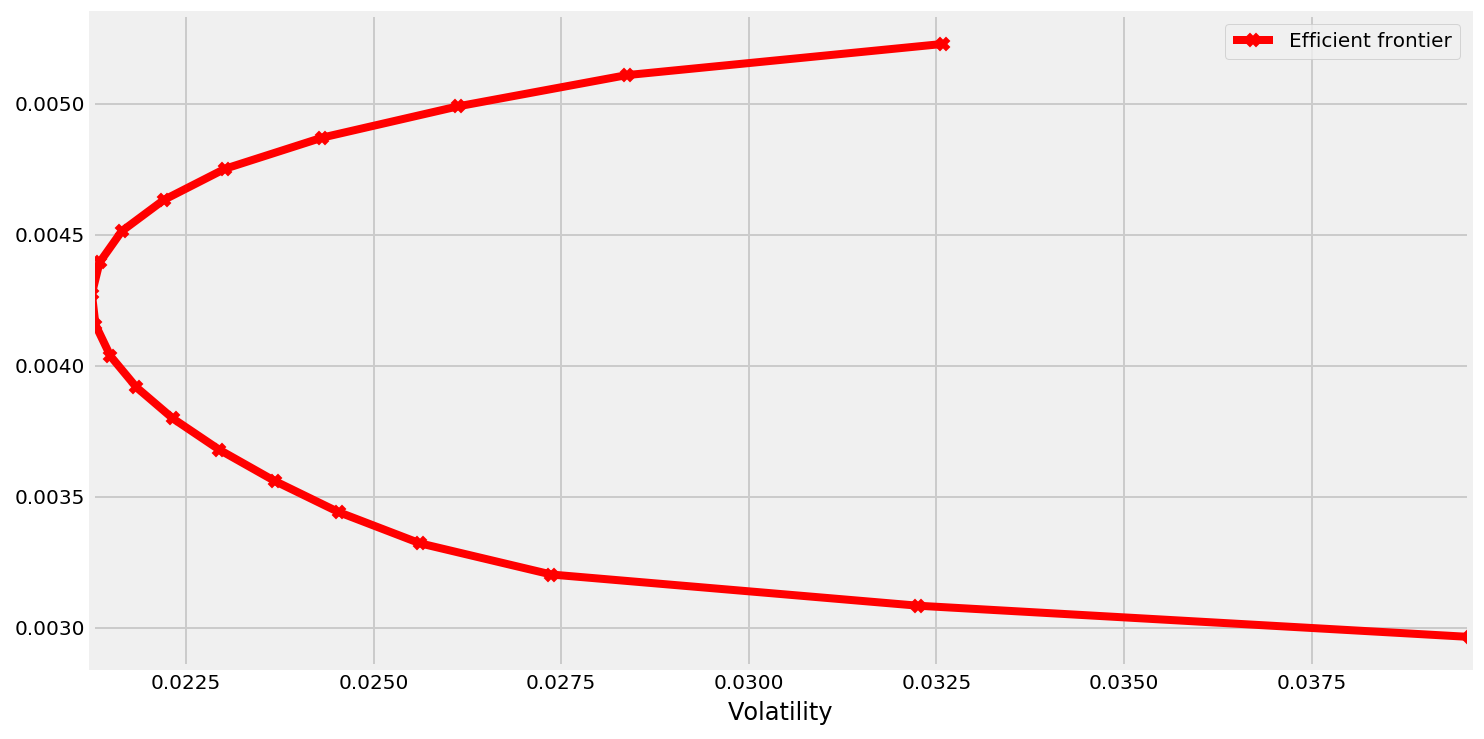

In [ ]:
efficient_frontier(20, data_train_mean[l], data_train_cov_mat.loc[l,l])

In [ ]:
def portfolio_std(wt, rt=None, cov=None):
    return np.sqrt(wt @ cov @ wt * periods_per_year)
def portfolio_returns(wt, rt=None, cov=None):
    return (wt @ rt + 1) ** periods_per_year - 1
def portfolio_performance(wt, rt, cov):
    r = portfolio_returns(wt, rt=rt)
    sd = portfolio_std(wt, cov=cov)
    return r, sd

In [ ]:
def neg_sharpe_ratio(weights, mean_ret, cov):
    r, sd = portfolio_performance(weights, mean_ret, cov)
    return -(r - rf_rate[0]) / sd

In [ ]:
weight_constraint = {'type': 'eq', 
                     'fun': lambda x: np.sum(np.abs(x))-1}

In [ ]:
def max_sharpe_ratio(mean_ret, cov, short=False):
    return minimize(fun=neg_sharpe_ratio,
                    x0=x0,
                    args=(mean_ret, cov),
                    method='SLSQP',
                    bounds=((-1 if short else 0, 1),) * n_assets,
                    constraints=weight_constraint,
                    options={'tol':1e-10, 'maxiter':1e4})

In [ ]:
def min_vol_target(mean_ret, cov, target, short=False):

    def ret_(wt):
        return portfolio_returns(wt, mean_ret)

    constraints = [{'type': 'eq',
                    'fun': lambda x: ret_(x) - target},
                   weight_constraint]

    bounds = ((-1 if short else 0, 1),) * n_assets
    return minimize(portfolio_std,
                    x0=x0,
                    args=(mean_ret, cov),
                    method='SLSQP',
                    bounds=bounds,
                    constraints=constraints,
                    options={'tol': 1e-10, 'maxiter': 1e4})

In [ ]:
def min_vol(mean_ret, cov, short=False):
    bounds = ((-1 if short else 0, 1),) * n_assets

    return minimize(fun=portfolio_std,
                    x0=x0,
                    args=(mean_ret, cov),
                    method='SLSQP',
                    bounds=bounds,
                    constraints=weight_constraint,
                    options={'tol': 1e-10, 'maxiter': 1e4})

In [ ]:
def efficient_frontier(mean_ret, cov, ret_range, short=False):
    return [min_vol_target(mean_ret, cov, ret) for ret in ret_range]

In [ ]:
simul_perf, simul_wt = simulate_portfolios(mean_returns, cov_matrix, short=False)

In [ ]:
print(simul_perf.describe())

       Annualized Standard Deviation  Annualized Returns  Sharpe Ratio
count                     100000.000          100000.000    100000.000
mean                           0.226               0.224         1.005
std                            0.028               0.039         0.233
min                            0.154               0.160         0.566
25%                            0.205               0.189         0.820
50%                            0.226               0.224         0.990
75%                            0.247               0.254         1.173
max                            0.280               0.298         1.639


# Max. Sharpe ratio Portfolio

In [ ]:
simul_max_sharpe = simul_perf.iloc[:, 2].idxmax()
simul_perf.iloc[simul_max_sharpe]

Annualized Standard Deviation   0.160
Annualized Returns              0.263
Sharpe Ratio                    1.639
Name: 25485, dtype: float64

In [ ]:
max_sharpe_pf = max_sharpe_ratio(mean_returns, cov_matrix, short=False)
max_sharpe_perf = portfolio_performance(max_sharpe_pf.x, mean_returns, cov_matrix)

In [ ]:
r, sd = max_sharpe_perf
pd.Series({'ret': r, 'sd': sd, 'sr': (r-rf_rate[0])/sd})

ret   0.259
sd    0.156
sr    1.649
dtype: float64

In [ ]:
max_sharpe_pf['x']

array([0.04888272, 0.15627044, 0.0233324 , 0.37931909, 0.2691778 ,
       0.12301755, 0.        ])

In [ ]:
SumStat['Max Drawdown(%)']

r_tcs        -26.790
r_infy       -30.350
r_wipro      -40.510
r_asianp     -27.510
r_hdfcb      -37.240
r_reliance   -36.340
r_lt         -50.290
Name: Max Drawdown(%), dtype: float64

In [ ]:
sum(max_sharpe_pf['x']*SumStat['Max Drawdown(%)'])

-31.927278625417113

# Mininum Volatility Portfolio

In [ ]:
min_vol_pf = min_vol(mean_returns, cov_matrix, short=False)
min_vol_perf = portfolio_performance(min_vol_pf.x, mean_returns, cov_matrix)

In [ ]:
r, sd = min_vol_perf
pd.Series({'ret': r, 'sd': sd, 'sr': (r-rf_rate[0])/sd})

ret   0.237
sd    0.150
sr    1.568
dtype: float64

In [ ]:
min_vol_pf['x']

array([0.15716641, 0.11827702, 0.09623143, 0.24320969, 0.25827842,
       0.08099542, 0.04584161])

In [ ]:
sum(min_vol_pf['x']*SumStat['Max Drawdown(%)'])

-33.25626602245138

In [ ]:
ret_range = np.linspace(simul_perf.iloc[:, 1].min(), simul_perf.iloc[:, 1].max(), 500)
eff_pf = efficient_frontier(mean_returns, cov_matrix, ret_range, short=True)
eff_pf = pd.Series(dict(zip([p['fun'] for p in eff_pf], ret_range)))


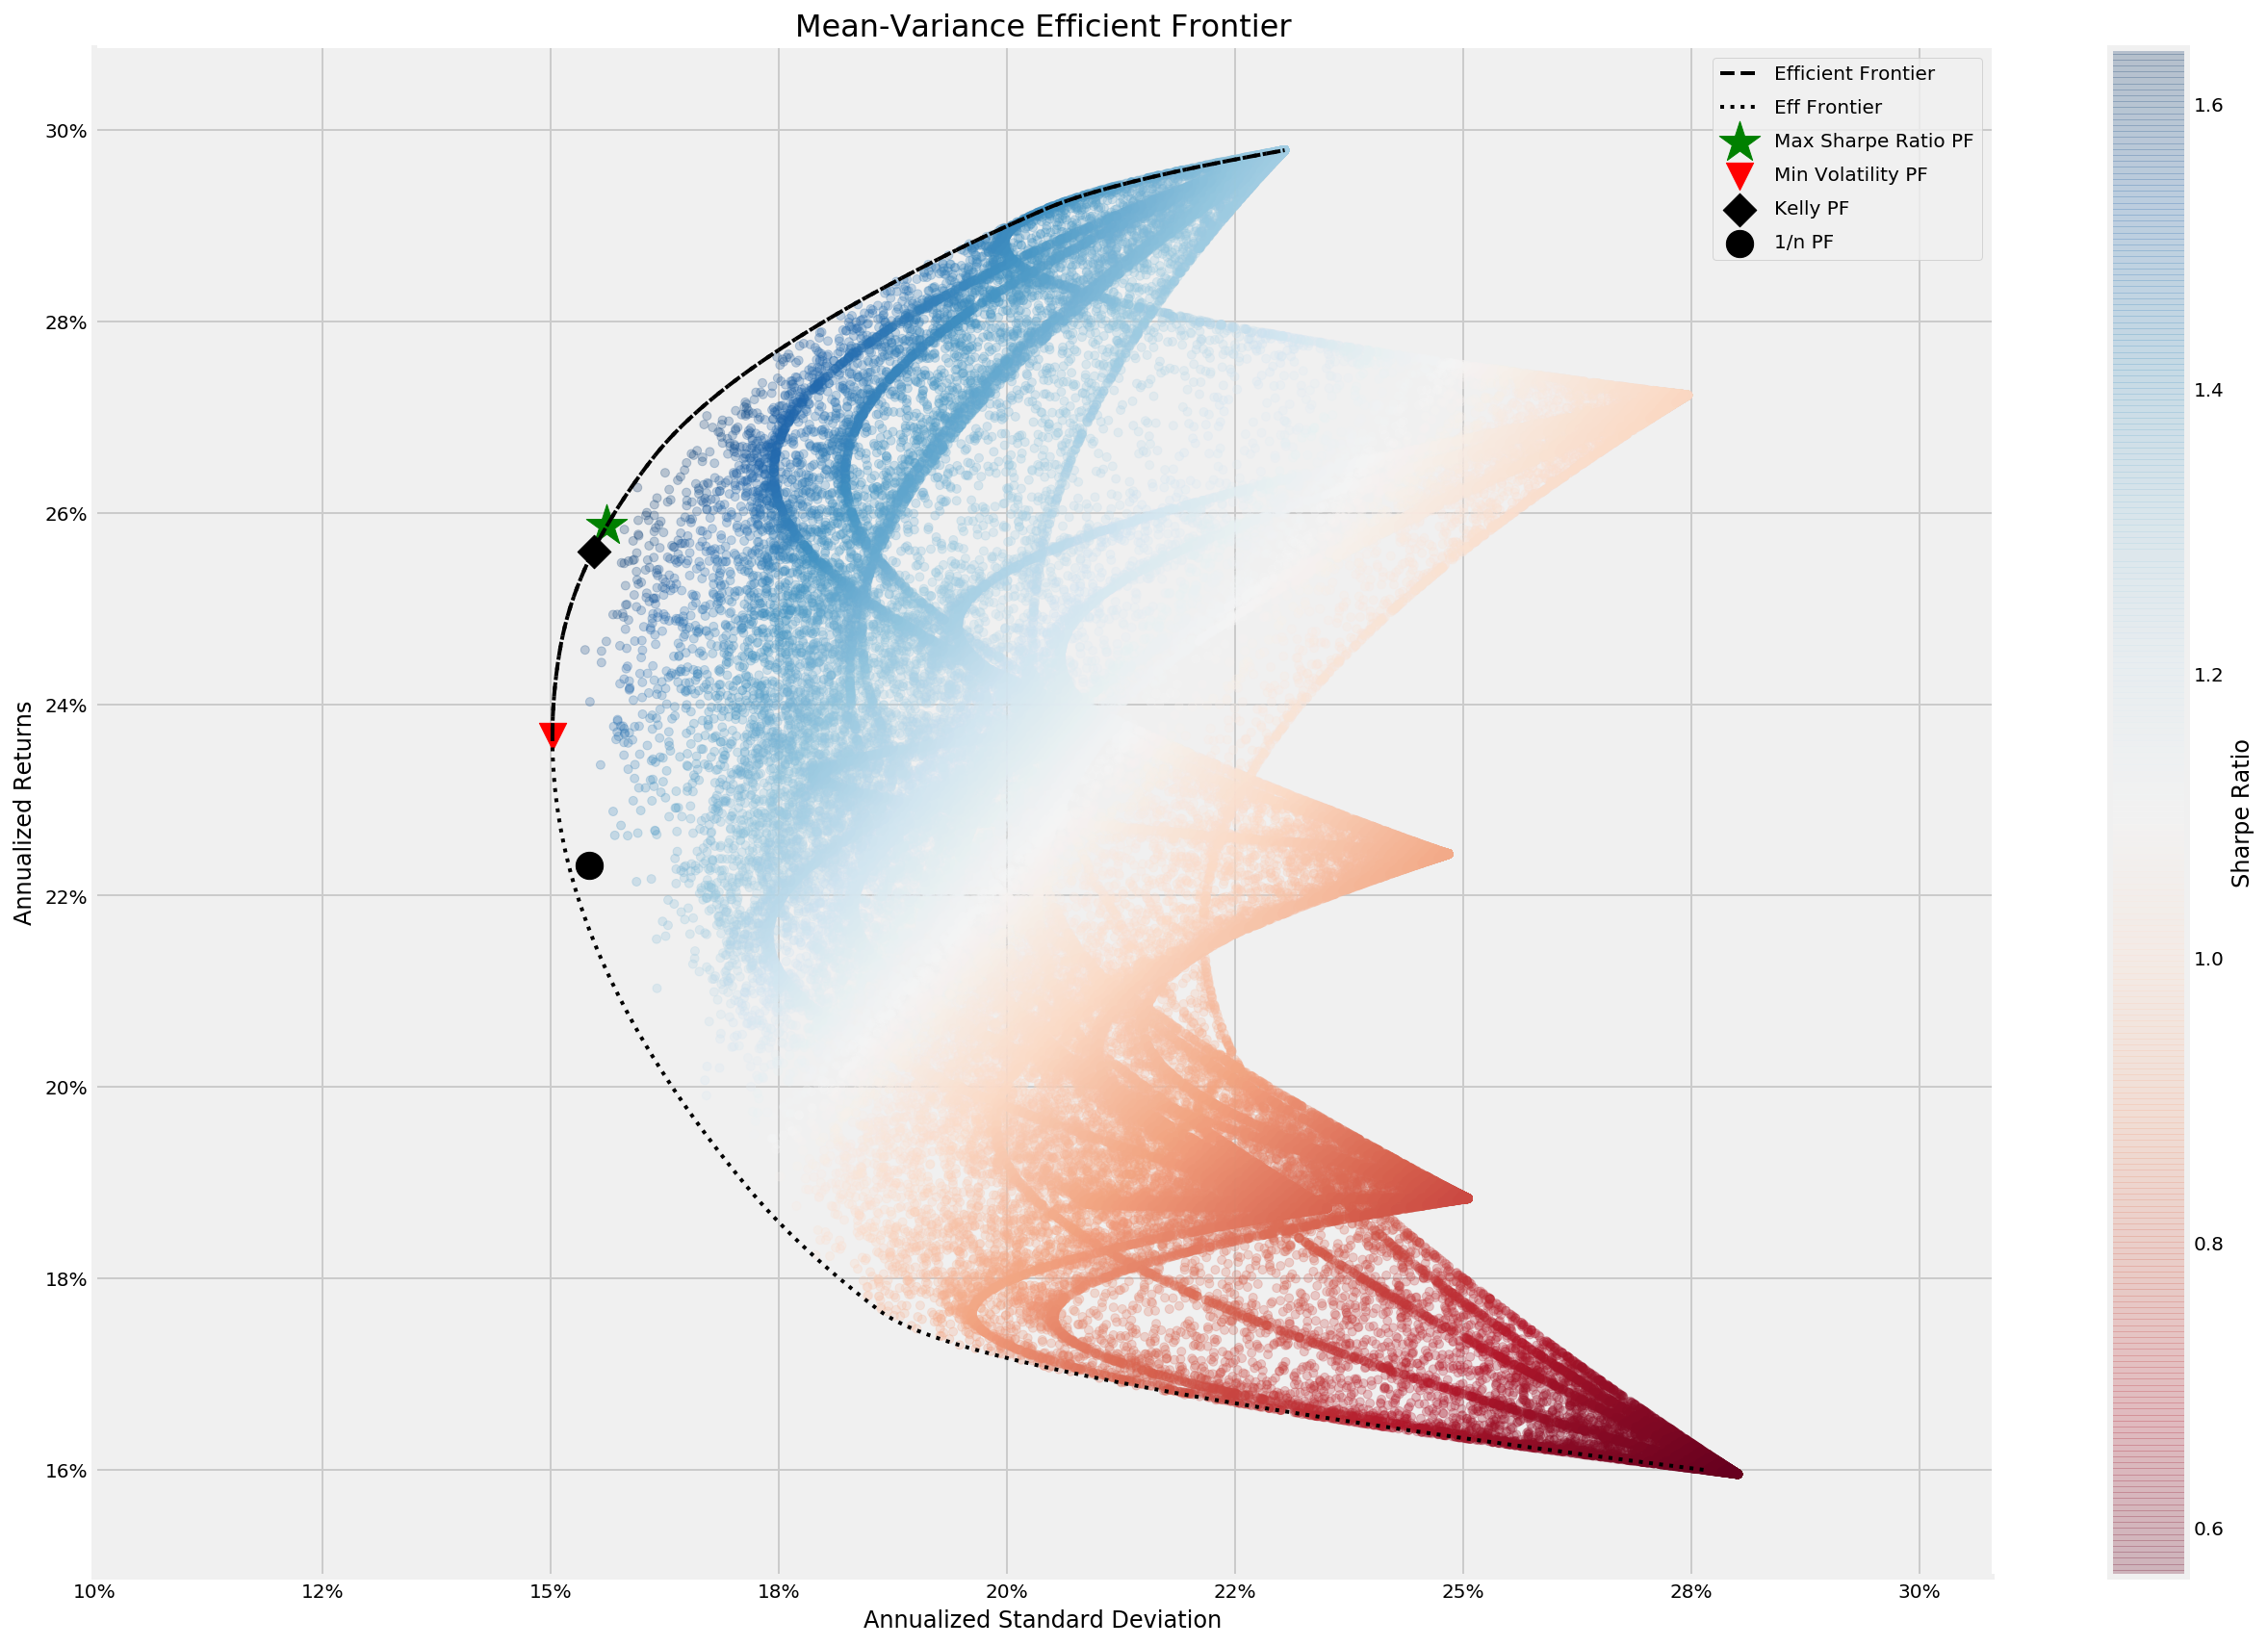

In [ ]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots()
simul_perf.plot.scatter(x=0, y=1, c=2, ax=ax, cmap='RdBu',alpha=0.25, 
                        figsize=(18, 12), colorbar=True)

eff_pf[eff_pf.index.min():].plot(linestyle='--', lw=2, ax=ax, c='k',
                                 label='Efficient Frontier')
eff_pf[eff_pf.index.max():].plot(linestyle=':', lw=2, ax=ax, c='k',
                                 label='Eff Frontier')

r, sd = max_sharpe_perf
ax.scatter(sd, r, marker='*', color='green', s=500, label='Max Sharpe Ratio PF')

r, sd = min_vol_perf
ax.scatter(sd, r, marker='v', color='red', s=200, label='Min Volatility PF')

kelly_wt = precision_matrix.dot(mean_returns).clip(lower=0).values
kelly_wt /= np.sum(np.abs(kelly_wt))
r, sd = portfolio_performance(kelly_wt, mean_returns, cov_matrix)
ax.scatter(sd, r, marker='D', color='k', s=150, label='Kelly PF')



r, sd = portfolio_performance(np.full(n_assets, 1/n_assets), mean_returns, cov_matrix)
ax.scatter(sd, r, marker='o', color='k', s=200, label='1/n PF')


ax.legend(labelspacing=0.8)
ax.set_xlim(0.1, eff_pf.max()+.01)
ax.set_title('Mean-Variance Efficient Frontier', fontsize=16)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
sns.despine()
fig.tight_layout();

# Kelly's Portfolio

In [ ]:
kelly_wt = precision_matrix.dot(mean_returns).clip(lower=0).values
kelly_wt /= np.sum(np.abs(kelly_wt))
r, sd = portfolio_performance(kelly_wt, mean_returns, cov_matrix)

In [ ]:
kelly_wt

array([0.06204341, 0.13526354, 0.0336588 , 0.35453271, 0.29983214,
       0.1146694 , 0.        ])

In [ ]:
sum(kelly_wt*SumStat['Max Drawdown(%)'])

-32.21693911627894

In [ ]:
pd.Series({'ret': r, 'sd': sd, 'sr': (r-rf_rate[0])/sd})

ret   0.256
sd    0.155
sr    1.647
dtype: float64

# Equal Weighted Portfolio

In [ ]:
r, sd = portfolio_performance(np.full(n_assets, 1/n_assets), mean_returns, cov_matrix)

In [ ]:
sum(1/n_assets*SumStat['Max Drawdown(%)'])

-35.575714285714284

In [ ]:
pd.Series({'ret': r, 'sd': sd, 'sr': (r-rf_rate[0])/sd})

ret   0.223
sd    0.154
sr    1.439
dtype: float64